# Global Influence

Question: How has global cinema interconnected, and what countries or regions have growing influence?


In [83]:
import pickle
import pandas as pd

# Importing the CMU Movies Dataframe that we created in a different pipeline
file_path = "../../pickles/cmu_movies_df.pkl" 
with open(file_path, 'rb') as f:
    df = pickle.load(f)
    
df.head()


,Wikipedia Movie ID,Freebase Movie ID,Movie Name,Release Date,Box Office Revenue,Runtime,Language Freebase ID,Language Name,Country Freebase ID,Country Name,Genre Freebase ID,Genre Name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/01jfsb, /m/06n90, /m/03npn, /m/03k9fj, /m/...","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[/m/02h40lc],[English Language],[/m/09c7w0],[United States of America],"[/m/02n4kr, /m/03bxz7, /m/07s9rl0, /m/0hj3n01]","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[/m/05f_3],[Norwegian Language],[/m/05b4w],[Norway],"[/m/0lsxr, /m/07s9rl0]","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[/m/02h40lc],[English Language],[/m/07ssc],[United Kingdom],"[/m/01jfsb, /m/0glj9q, /m/09blyk]","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[/m/04306rv],[German Language],[/m/0345h],[Germany],[/m/07s9rl0],[Drama]


Our analysis does not require freebase or wikidata IDs, so let us drop them:

In [84]:
df = df.drop(columns=['Wikipedia Movie ID','Freebase Movie ID', 'Country Freebase ID', 'Language Freebase ID', 'Genre Freebase ID'])
df.head()

,Movie Name,Release Date,Box Office Revenue,Runtime,Language Name,Country Name,Genre Name
0,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


Now, let us see if there are any nulls in our data:

In [85]:
# Checking for nulls
print(df.isnull().sum())


Movie Name                0
Release Date           6902
Box Office Revenue    73340
Runtime               20450
Language Name             0
Country Name              0
Genre Name                0
dtype: int64


Hmmm it seems that we have a significant null sum in Box Office Revenue and Runtime. Since we cannot use mean....We shall just drop for the global analysis 

### Global Distribution of Movies by Country:

Let us see what country produced the most movies in this data set. 

For movies that were produced by multiple companies from multiple countries, we will attribute it as +1 for each country. 

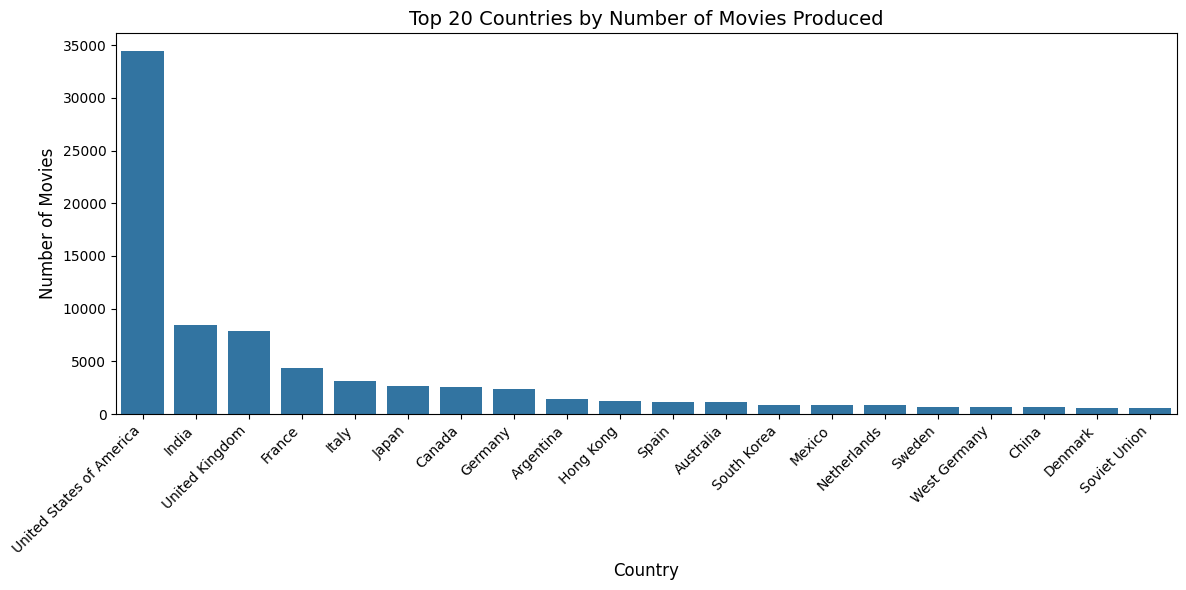

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Check if the 'Country Name' contains lists and explode the column if necessary
if isinstance(df['Country Name'].iloc[0], list):
    df = df.explode('Country Name')

# Count the number of movies produced by each country
country_movie_counts = df['Country Name'].value_counts()

# Taking top 20 countries
top_countries = country_movie_counts.head(20)

# Plotting our work 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 20 Countries by Number of Movies Produced', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying the plot
plt.show()

### Box Office Revenue by Country:

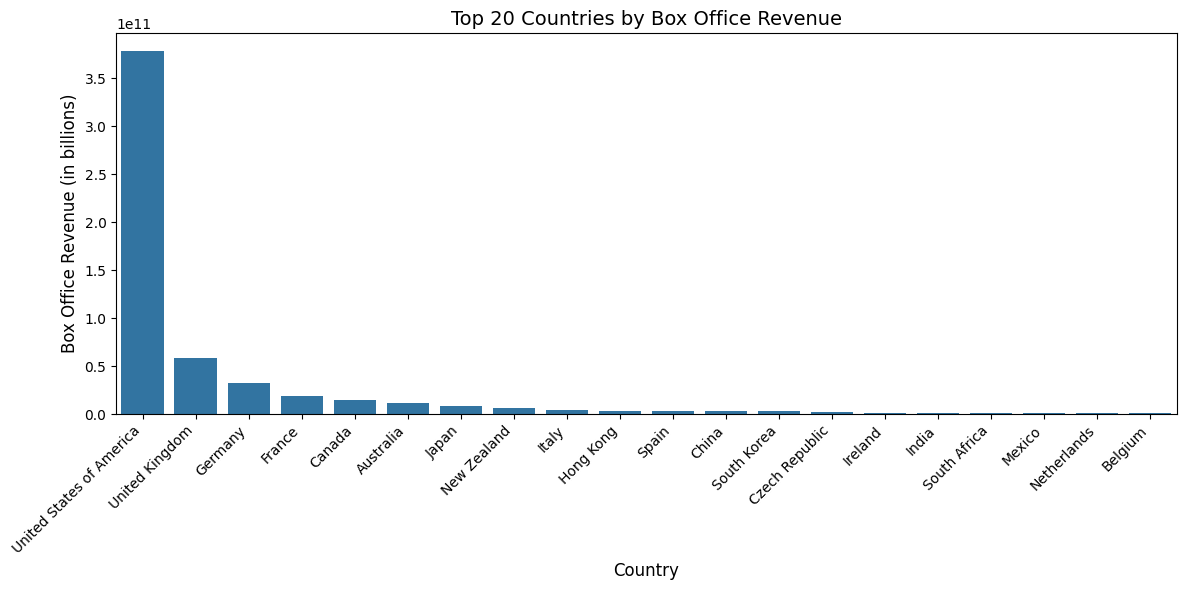

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check if the 'Country Name' contains lists and explode the column if necessary
if isinstance(df['Country Name'].iloc[0], list):
    df = df.explode('Country Name')

# Convert the 'Box Office Revenue' to numeric, handling non-numeric values
df['Box Office Revenue'] = pd.to_numeric(df['Box Office Revenue'], errors='coerce')

# Group the data by 'Country Name' and sum the box office revenue for each country
country_revenue = df.groupby('Country Name')['Box Office Revenue'].sum()

# Sort the countries by box office revenue in descending order and select the top 20
top_countries_revenue = country_revenue.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_revenue.index, y=top_countries_revenue.values)
plt.title('Top 20 Countries by Box Office Revenue', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Box Office Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


### Language analysis 

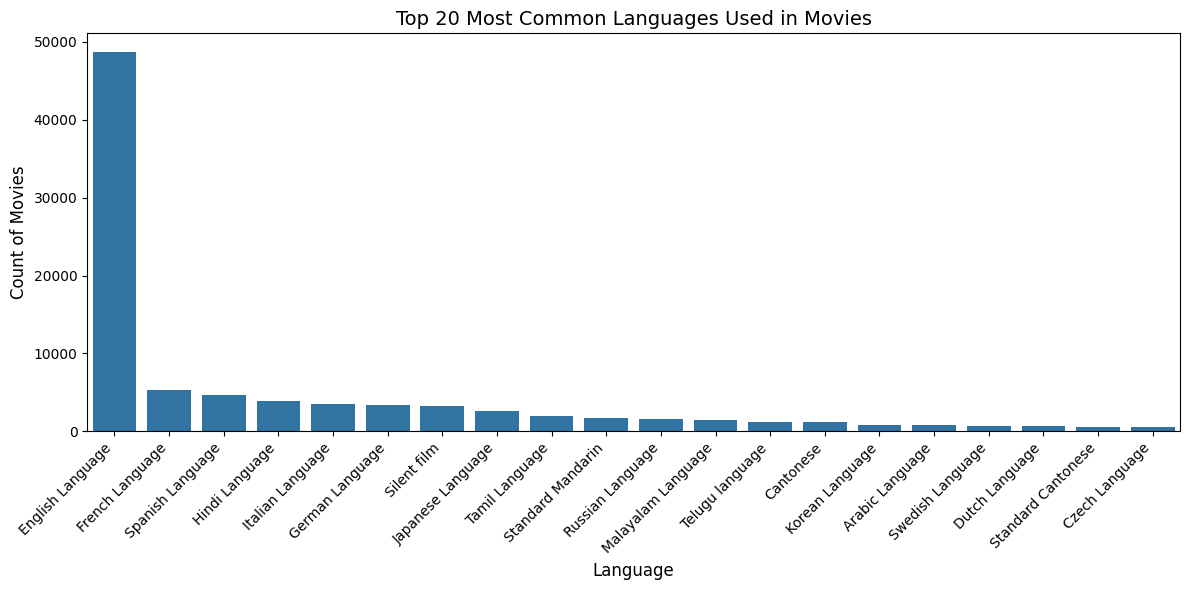

In [88]:
# Check if 'Language Name' contains lists and explode the column if necessary
if isinstance(df['Language Name'].iloc[0], list):
    df = df.explode('Language Name')

# Group by language and count the occurrences
language_counts = df['Language Name'].value_counts()

# Get the top 20 most common languages
top_20_languages = language_counts.head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_languages.index, y=top_20_languages.values)
plt.title('Top 20 Most Common Languages Used in Movies', fontsize=14)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Count of Movies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

In [89]:
# Now, let's associate languages with the countries where they are most prevalent
# Group by Language and Country and count occurrences
language_country_counts = df.groupby(['Language Name', 'Country Name']).size().reset_index(name='Count')

# Filter to get the top country for each language in the top 20
top_languages_countries = language_country_counts[language_country_counts['Language Name'].isin(top_20_languages.index)]

# Find the most common country for each language by first selecting the grouping columns explicitly
top_languages_countries_sorted = top_languages_countries.loc[
    top_languages_countries.groupby('Language Name')['Count'].idxmax()
].reset_index(drop=True)

# Step: Sort the DataFrame in descending order of Count (number of occurrences)
top_languages_countries_sorted = top_languages_countries_sorted.sort_values(by='Count', ascending=False)

# Display the most common countries for the top 20 languages, sorted in descending order
top_languages_countries_sorted


,Language Name,Country Name,Count
4,English Language,United States of America,30528
7,Hindi Language,India,3471
5,French Language,France,2402
13,Silent film,United States of America,2152
8,Italian Language,Italy,2141
9,Japanese Language,Japan,2013
18,Tamil Language,India,1659
14,Spanish Language,Argentina,1412
11,Malayalam Language,India,1296
19,Telugu language,India,1109


### Genre by country 

In [92]:
# If genres are in a list format, you can explode them into separate rows
# Assuming 'Genre Name' contains a list of genres
df_exploded_genre= df.explode('Genre Name')

# Count the frequency of each genre
genre_counts = df_exploded_genre['Genre Name'].value_counts()

# Get the top 20 genres
top_20_genres = genre_counts.head(20)

# Display the top 20 genres
top_20_genres

Genre Name
Drama               53136
Comedy              23186
World cinema        16348
Romance Film        16041
Thriller            14634
Action              13821
Black-and-white     12074
Indie               11224
Crime Fiction       10559
Short Film           9871
Action/Adventure     8403
Adventure            8364
Documentary          8257
Silent film          8053
Horror               7404
Romantic drama       6363
Family Film          5997
War film             5765
Musical              5316
Mystery              5074
Name: count, dtype: int64

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Country Name' and 'Genre Name' and count occurrences
genre_country_counts = df_exploded_genre.groupby(['Country Name', 'Genre Name']).size().reset_index(name='Count')

# Now, for each country, find the most popular genre
most_popular_genre_per_country = genre_country_counts.groupby('Country Name').apply(
    lambda x: x.nlargest(1, 'Count')).reset_index(drop=True)

# Sort by country for clarity
most_popular_genre_per_country_sorted = most_popular_genre_per_country.sort_values(by='Count', ascending=False)

# Display the result
most_popular_genre_per_country_sorted

/var/folders/jm/kpgxt7bx5qjd7x3dffymccd80000gn/T/ipykernel_81513/4184222886.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_popular_genre_per_country = genre_country_counts.groupby('Country Name').apply(


,Country Name,Genre Name,Count
135,United States of America,Drama,15999
55,India,Drama,5059
134,United Kingdom,Drama,4528
42,France,Drama,3854
65,Japan,Japanese Movies,2760
...,...,...,...
28,Crime,Crime Fiction,1
129,Turkmenistan,Drama,1
59,Iraqi Kurdistan,Drama,1
77,Malayalam Language,Action,1


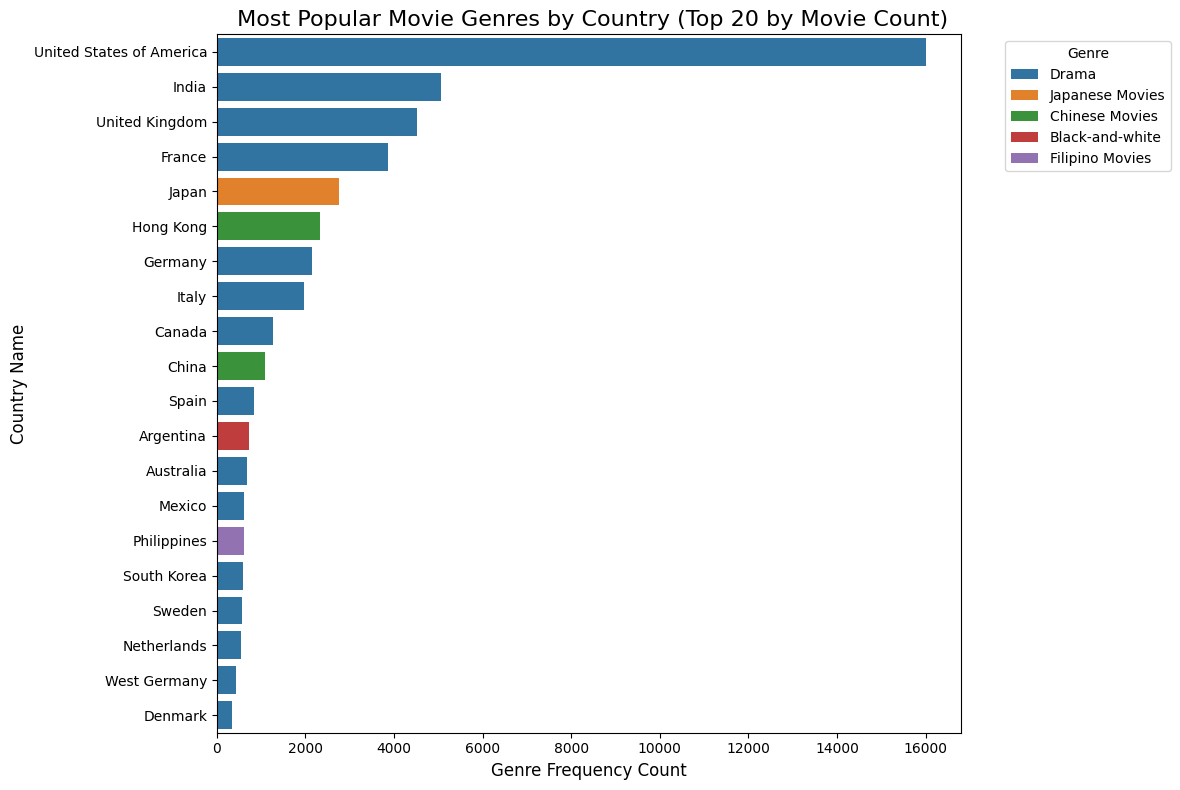

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress the DeprecationWarning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Group by 'Country Name' and 'Genre Name' and count occurrences
genre_country_counts = df_exploded_genre.groupby(['Country Name', 'Genre Name']).size().reset_index(name='Count')

# Step 1: Identify the Top 20 countries by total movie count
top_20_movie_count_countries = df['Country Name'].value_counts().head(20).index

# Filter the genre_country_counts to only include the top 20 movie count countries
top_20_genre_country_counts = genre_country_counts[genre_country_counts['Country Name'].isin(top_20_movie_count_countries)]

# Step 2: Sort by count within each country and select the top 2 genres
top_20_genre_country_sorted = top_20_genre_country_counts.groupby('Country Name').apply(lambda x: x.nlargest(2, 'Count')).reset_index(drop=True)

# Step 3: Extract the most popular genre for each country
most_popular_genre = top_20_genre_country_sorted.groupby('Country Name').nth(0).reset_index()

# Step 4: Sort by count in descending order to focus on the most frequent second genres
most_popular_genre_sorted = most_popular_genre.sort_values(by='Count', ascending=False)

# Step 5: Plot the second most popular genres
plt.figure(figsize=(12, 8))
sns.barplot(data=most_popular_genre_sorted, x='Count', y='Country Name', hue='Genre Name', dodge=False)
plt.title(' Most Popular Movie Genres by Country (Top 20 by Movie Count)', fontsize=16)
plt.xlabel('Genre Frequency Count', fontsize=12)
plt.ylabel('Country Name', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


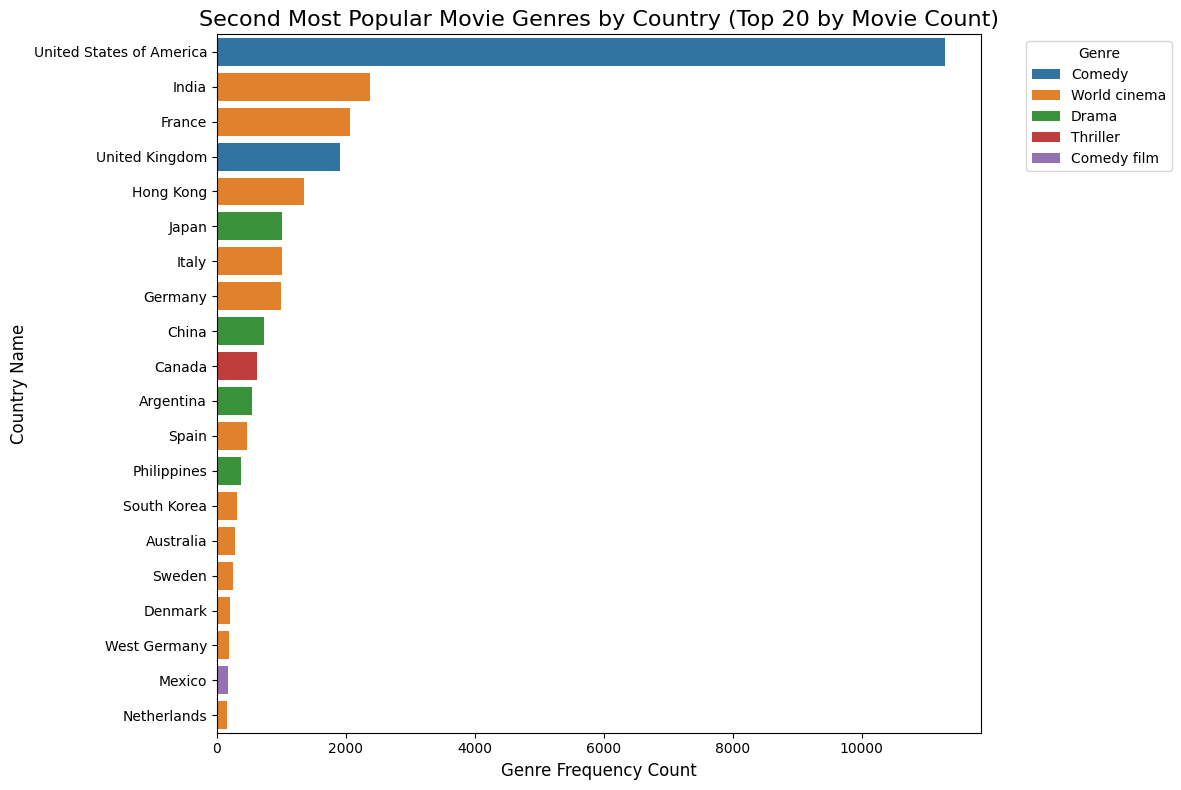

In [ ]:

# Step 3: Extract the second most popular genre for each country
second_most_popular_genre = top_20_genre_country_sorted.groupby('Country Name').nth(1).reset_index()

# Step 4: Sort by count in descending order to focus on the most frequent second genres
second_most_popular_genre_sorted = second_most_popular_genre.sort_values(by='Count', ascending=False)

# Step 5: Plot the second most popular genres
plt.figure(figsize=(12, 8))
sns.barplot(data=second_most_popular_genre_sorted, x='Count', y='Country Name', hue='Genre Name', dodge=False)
plt.title('Second Most Popular Movie Genres by Country (Top 20 by Movie Count)', fontsize=16)
plt.xlabel('Genre Frequency Count', fontsize=12)
plt.ylabel('Country Name', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()
